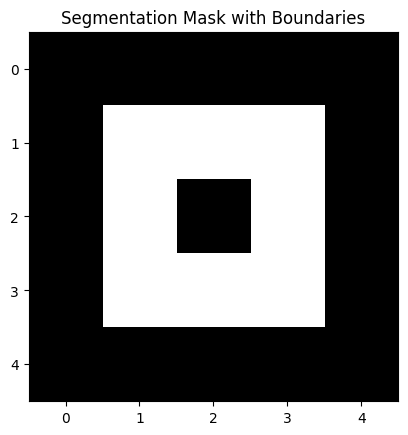

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Example boolean mask
boolean_mask = np.array([[False, False, False, False, False],
                         [False, True,  True,  True,  False],
                         [False, True,  False, True,  False],
                         [False, True,  True,  True,  False],
                         [False, False, False, False, False]])

# Convert boolean mask to an 8-bit unsigned integer mask
int_mask = (boolean_mask * 255).astype(np.uint8)

# Convert the mask to a BGR image
bgr_mask = cv2.merge([int_mask, int_mask, int_mask])

# Convert the mask to grayscale
imgray = cv2.cvtColor(bgr_mask, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Create an empty image for drawing contours
tmp = np.zeros_like(bgr_mask)

# Draw the contours on the empty image
boundary = cv2.drawContours(tmp, contours, -1, (255, 255, 255), 1)

# Convert the boundary image to grayscale
boundary_gray = cv2.cvtColor(boundary, cv2.COLOR_BGR2GRAY)

# Set boundary pixels to 255
boundary_gray[boundary_gray > 0] = 255

# Visualize the boundary
plt.imshow(boundary_gray, cmap='gray')
plt.title('Segmentation Mask with Boundaries')
plt.show()

# Save the boundary image
plt.imsave("mask_boundary.png", boundary_gray, cmap='gray')


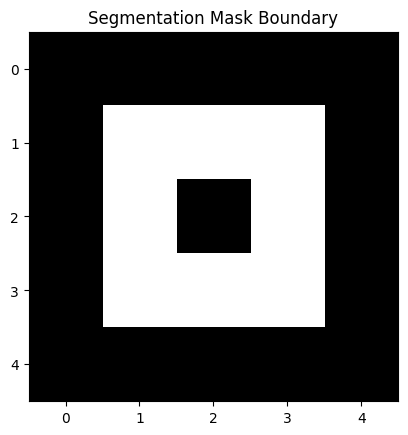

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Example boolean mask
boolean_mask = np.array([[False, False, False, False, False],
                         [False, True,  True,  True,  False],
                         [False, True,  False, True,  False],
                         [False, True,  True,  True,  False],
                         [False, False, False, False, False]])

# Convert boolean mask to an 8-bit unsigned integer mask
int_mask = (boolean_mask * 255).astype(np.uint8)

# Find contours
contours, hierarchy = cv2.findContours(int_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Create an empty image for drawing contours
boundary_image = np.zeros_like(int_mask)

# Draw the contours on the empty image
cv2.drawContours(boundary_image, contours, -1, (255), 1)

# Visualize the boundary
plt.imshow(boundary_image, cmap='gray')
plt.title('Segmentation Mask Boundary')
plt.show()

# Save the boundary image
plt.imsave("mask_boundary.png", boundary_image, cmap='gray')


## SAM Mask

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
sam_mask = np.load('sam_mask.npy')
sam_mask.shape

boolean_mask = sam_mask[0]
boolean_mask.shape

(1280, 720)

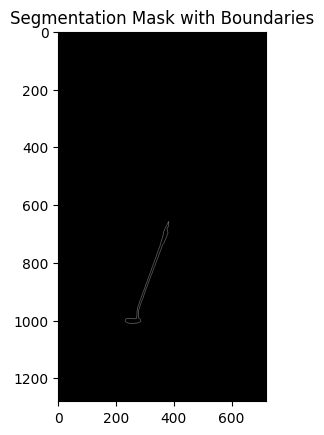

In [5]:
# Convert boolean mask to an 8-bit unsigned integer mask
int_mask = (boolean_mask * 255).astype(np.uint8)

# Convert the mask to a BGR image
bgr_mask = cv2.merge([int_mask, int_mask, int_mask])

# Convert the mask to grayscale
imgray = cv2.cvtColor(bgr_mask, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image
ret, thresh = cv2.threshold(imgray, 127, 255, 0)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Create an empty image for drawing contours
tmp = np.zeros_like(bgr_mask)

# Draw the contours on the empty image
boundary = cv2.drawContours(tmp, contours, -1, (255, 255, 255), 1)

# Convert the boundary image to grayscale
boundary_gray = cv2.cvtColor(boundary, cv2.COLOR_BGR2GRAY)

# Set boundary pixels to 255
boundary_gray[boundary_gray > 0] = 255

# Visualize the boundary
plt.imshow(boundary_gray, cmap='gray')
plt.title('Segmentation Mask with Boundaries')
plt.show()

# Save the boundary image
plt.imsave("mask_boundary.png", boundary_gray, cmap='gray')

In [6]:
boundary_gray.shape

(1280, 720)

In [7]:
type(boundary_gray)

numpy.ndarray

In [8]:
# [{'x': 213, 'y': 628, 'width': 208, 'height': 399, 'label': ''}]

# Assuming 'image' is your NumPy array representing the image

# Example top left corner and crop size
top_left_x = 213  # X coordinate of the top left corner
top_left_y = 628  # Y coordinate of the top left corner
crop_width = 208  # Width of the crop region
crop_height = 399  # Height of the crop region

# Perform the cropping operation
cropped_image = boundary_gray[top_left_y:top_left_y + crop_height, top_left_x:top_left_x + crop_width]

# Display the cropped image shape
print("Cropped image shape:", cropped_image.shape)

Cropped image shape: (399, 208)


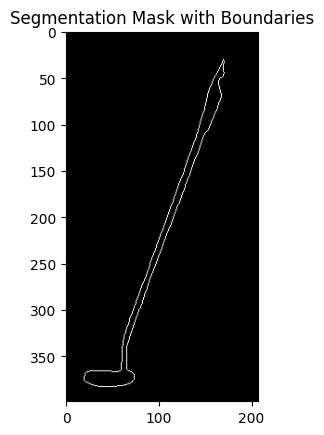

In [9]:
# Visualize the boundary
plt.imshow(cropped_image, cmap='gray')
plt.title('Segmentation Mask with Boundaries')
plt.show()

# Save the boundary image
plt.imsave("cropped_image.png", cropped_image, cmap='gray')

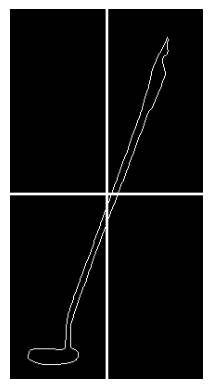

In [35]:

# Assuming 'image' is your NumPy array representing the image
# Make sure the image is in the BGR format as OpenCV uses BGR format

# Get the dimensions of the image
height, width = cropped_image.shape[:3]

# Define the color (BGR format) and thickness of the lines
color = (255, 0, 0)  # Blue color (in BGR format)
thickness = 2  # Thickness of the line

# Calculate the midpoints
mid_width = width // 2
mid_height = height // 2

# Draw a vertical line in the middle
cv2.line(cropped_image, (mid_width, 0), (mid_width, height), color, thickness)

# Draw a horizontal line in the middle
cv2.line(cropped_image, (0, mid_height), (width, mid_height), color, thickness)

# Display the resulting image using matplotlib
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.imsave("lines.png", cropped_image, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


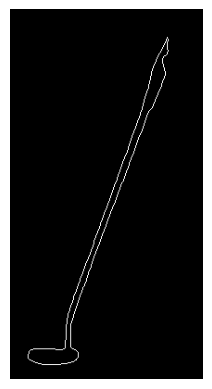

In [11]:
# Assuming 'image' is your NumPy array representing the image

# Get the dimensions of the image
height, width = cropped_image.shape[:2]

# Define the color (BGR format) and thickness of the box
color = (0, 0, 0)  # Green color (in BGR format)
thickness = 2  # Thickness of the box outline

# Calculate the midpoints
mid_width = width // 2
mid_height = height // 2

# Calculate the top-left and bottom-right coordinates of the box
box_width = width // 2
box_height = height // 2
top_left_x = mid_width - (box_width // 2)
top_left_y = mid_height - (box_height // 2)
bottom_right_x = mid_width + (box_width // 2)
bottom_right_y = mid_height + (box_height // 2)

# Draw the rectangle (box)
cv2.rectangle(cropped_image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), color, thickness)

# Display the resulting image using matplotlib
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


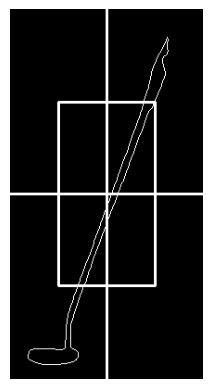

In [37]:
# Assuming 'image' is your NumPy array representing the image

# Get the dimensions of the image
height, width = cropped_image.shape[:2]

# Define the color (BGR format) and thickness of the box
color = (255, 255, 255)  # Green color (in BGR format)
thickness = 2  # Thickness of the box outline

# Calculate the midpoints
mid_width = width // 2
mid_height = height // 2

# Calculate the top-left and bottom-right coordinates of the box
box_width = width // 2
box_height = height // 2
top_left_x = mid_width - (box_width // 2)
top_left_y = mid_height - (box_height // 2)
bottom_right_x = mid_width + (box_width // 2)
bottom_right_y = mid_height + (box_height // 2)

# Draw the rectangle (box)
cv2.rectangle(cropped_image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), color, thickness)

# Display the resulting image using matplotlib
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.imsave("rectangle.png", cropped_image, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


In [13]:
plt.imsave("box_image.png", cropped_image, cmap='gray')

In [14]:
# Define function to check if a pixel is white
def is_white(pixel):
    return pixel == 255

# Check around the perimeter of the box for white pixels
white_pixels = []
black_pixels = []
top_edge_white_pixels = []
bottom_edge_white_pixes = []

# Top edge
for x in range(top_left_x, bottom_right_x + 1):
    if is_white(cropped_image[top_left_y, x]):
        white_pixels.append((top_left_y, x))
        top_edge_white_pixels.append((top_left_y, x))
    else:
        black_pixels.append((top_left_y, x))

# Bottom edge
for x in range(top_left_x, bottom_right_x + 1):
    if is_white(cropped_image[bottom_right_y, x]):
        white_pixels.append((bottom_right_y, x))
        bottom_edge_white_pixes.append((bottom_right_y, x))
    else:
        black_pixels.append((bottom_right_y, x))

# Left edge
for y in range(top_left_y, bottom_right_y + 1):
    if is_white(cropped_image[y, top_left_x]):
        white_pixels.append((y, top_left_x))
    else:
        black_pixels.append((y, top_left_x))

# Right edge
for y in range(top_left_y, bottom_right_y + 1):
    if is_white(cropped_image[y, bottom_right_x]):
        white_pixels.append((y, bottom_right_x))
    else:
        black_pixels.append((y, bottom_right_x))

# Display the white pixel coordinates found
print("White pixels around the perimeter of the box:", white_pixels)

# Display the resulting image using matplotlib
# plt.imshow(image, cmap='gray')
# plt.axis('off')  # Turn off axis numbers and ticks
# plt.show()

White pixels around the perimeter of the box: [(100, 144), (100, 155), (298, 73), (298, 80)]


In [15]:
len(white_pixels), len(black_pixels)

(4, 604)

In [16]:
cropped_image.shape

(399, 208)

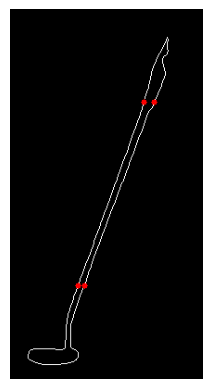

In [17]:
image_bgr = cv2.cvtColor(cropped_image, cv2.COLOR_GRAY2BGR)

dot_color = (0, 0, 255)  # Red color for the dots (BGR format)
dot_radius = 3  # Radius of the red dots

# Draw red dots at the coordinates of the white pixels
for (y, x) in white_pixels:
    cv2.circle(image_bgr, (x, y), dot_radius, dot_color, -1)

# Convert the image to RGB format for display
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Display the resulting image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [18]:
plt.imsave("box_pixels.png", image_rgb)

In [19]:
top_edge_white_pixels

[(100, 144), (100, 155)]

In [20]:
if top_edge_white_pixels[0][1] < top_edge_white_pixels[1][1]:
    pt_1 = top_edge_white_pixels[0]
    pt_2 = top_edge_white_pixels[1]
else:
    pt_1 = top_edge_white_pixels[1]
    pt_2 = top_edge_white_pixels[0] 

In [21]:
bottom_edge_white_pixes

[(298, 73), (298, 80)]

In [22]:
if bottom_edge_white_pixes[0][1] < bottom_edge_white_pixes[1][1]:
    pt_3 = bottom_edge_white_pixes[0]
    pt_4 = bottom_edge_white_pixes[1]
else:
    pt_3 = bottom_edge_white_pixes[1]
    pt_4 = bottom_edge_white_pixes[0]

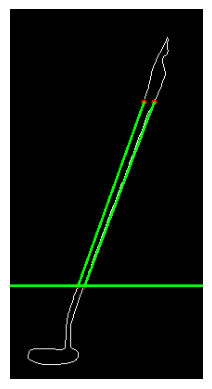

In [23]:
image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)

# golf stick lines
cv2.line(image_bgr, (pt_1[1], pt_1[0]), (pt_3[1], pt_3[0]), color=(0,255,0), thickness=2)
cv2.line(image_bgr, (pt_2[1], pt_2[0]), (pt_4[1], pt_4[0]), color=(0,255,0), thickness=2)

# horizontal line on the image
cv2.line(image_bgr, (0, pt_3[0]), (crop_width-1, pt_3[0]), color=(0,255,0), thickness=2)

# Convert the image to RGB format for display
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Display the resulting image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

In [24]:
plt.imsave("box_pixels.png", image_rgb)

In [25]:
image_rgb.shape

(399, 208, 3)

In [26]:
# calculate angle 
# line1: p1, p3
# line2: p2, p4 
# 3rd point: 0, p_3[0]

import math 

def get_angle(line1, line2):
    """get angle between two lines represented by points in degrees"""
    # Get directional vectors
    d1 = (line1[1][0] - line1[0][0], line1[1][1] - line1[0][1])
    d2 = (line2[1][0] - line2[0][0], line2[1][1] - line2[0][1])
    # Compute dot product
    p = d1[0] * d2[0] + d1[1] * d2[1]
    # Compute norms
    n1 = math.sqrt(d1[0] * d1[0] + d1[1] * d1[1])
    n2 = math.sqrt(d2[0] * d2[0] + d2[1] * d2[1])
    # Compute angle
    try:
        ang = math.acos(p / (n1*n2))
    except:
        ang = 0
    # Convert to degrees if you want
    ang = math.degrees(ang)
    return ang

In [27]:
line1 = [(pt_1[1],pt_1[0]), (pt_3[1], pt_3[0])]
h_line1 = [(pt_3[1], pt_3[0]), (crop_width-1, pt_3[0])]

line2 = [(pt_2[1],pt_2[0]), (pt_4[1], pt_4[0])]
h_line2 = [(pt_4[1], pt_4[0]), (crop_width-1, pt_3[0])]

In [28]:
ang1 = get_angle(line1, h_line1)
ang1

109.72711570917194

In [29]:
ang2 = get_angle(line2, h_line2)
ang2

110.74608027568341

In [33]:
180 - ang2

69.25391972431659